<a href="https://colab.research.google.com/github/mld3/hack_aotearoa_intro_ml/blob/master/workshop_notebook_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 0 - Requirements
Check scikit-learn version, install tqdm if necessary, load useful packages.

In [0]:
import sklearn
import pandas as pd
import numpy as np
import itertools
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
!wget http://web.eecs.umich.edu/~wiensj/workshop/helper_colab.py

--2019-01-17 04:34:33--  http://web.eecs.umich.edu/~wiensj/workshop/helper_colab.py
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.110
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6702 (6.5K) [text/plain]
Saving to: ‘helper_colab.py’

helper_colab.py     100%[===================>]   6.54K  --.-KB/s    in 0s      

2019-01-17 04:34:33 (245 MB/s) - ‘helper_colab.py’ saved [6702/6702]



In [0]:
from helper_colab import *

#### 1 - Feature extraction

### 1a)
Study generate feature vector(df) in the helper.py file. The input to this function is a pd.DataFrame containing the data for a single patient admission. The output is a python dictio- nary object, corresponding to a d-dimensional feature vector for this patient (with missing values). The keys of this dictionary are feature names, and the values are the corresponding feature values. For the time-invariant variables, we use the raw values. We replace unknown observations (−1) with unde- fined (use np.nan), and name these features with the original variable names. For each time-varying variable, we compute the mean of all measurements for that variable.

(i) Read the [documentation](https://physionet.org/challenge/2012/\#general-descriptors) on the variable ICUType, and reflect on the current feature representation of this variable.**What does such a representation imply, when using a linear classifier? How else might you represent this variable (as possibly more than one feature)?**

(ii) Here we only consider the mean of the numerical variables. **What limitations are associated with this representation? What other summary statistics could be useful?**



### 1b)
Study impute missing values(X). Given a feature matrix X (where each row corresponds to a patient admission and each column a feature) with missing values, we consider each feature column independently. For each column, we impute the missing values by replacing it with the mean value of the observed values in that column.**What assumptions does this imputation approach make? How else might you handle missing data?**

### 1c)
Notice that many of these feature values lie on very different scales. To address this, we normalize each feature column xd to have range between 0 and 1. **Why might it be useful to scale the features in this way?**

### 1d)
Review the implementation of get train test split(). This helper function uses the three functions described above. First, it generates a feature vector for each patient, then aggregates them into a feature matrix (features are sorted alphabetically by name), and lastly performs imputation and normal- ization with respect to the population. After all these steps, it splits the data into 80% train and 20% test. Report

(i) the dimensionality $d$ of feature vector
(ii) the average feature vector, and the corresponding name for each feature of the training set.

In [5]:
X_train, y_train, X_test, y_test, feature_names = get_train_test_split()

Generating feature vectors: 100%|██████████| 2500/2500 [01:38<00:00, 25.41it/s]


In [6]:
print("Dimensionality:")
print(f"d = {X_train.shape[1]}")

Dimensionality:
d = 40


In [7]:
print("Average feature vector:")
print(pd.DataFrame({"Feature Name": feature_names, "Mean value": X_train.mean(axis=0)}))

Average feature vector:
        Feature Name  Mean value
0                Age    0.653507
1             Gender    0.557000
2             Height    0.390707
3            ICUType    0.578333
4             Weight    0.236098
5           mean_ALP    0.058284
6           mean_ALT    0.015867
7           mean_AST    0.013781
8       mean_Albumin    0.445900
9           mean_BUN    0.143020
10    mean_Bilirubin    0.039455
11  mean_Cholesterol    0.368926
12   mean_Creatinine    0.082277
13      mean_DiasABP    0.555640
14         mean_FiO2    0.359233
15          mean_GCS    0.720369
16      mean_Glucose    0.207822
17         mean_HCO3    0.382337
18          mean_HCT    0.416416
19           mean_HR    0.467974
20            mean_K    0.338213
21      mean_Lactate    0.076291
22          mean_MAP    0.300090
23           mean_Mg    0.158574
24    mean_NIDiasABP    0.542114
25        mean_NIMAP    0.575976
26     mean_NISysABP    0.501373
27           mean_Na    0.515676
28        mean_PaCO

#### 2 - Hyperparameter and model selection

##### 2.1 - Linear-kernel SVM

##### 2.1a

To begin, complete the implementation of the function cv\_performance(clf, X, y, metric=\textquotesingle accuracy\textquotesingle, k=5) as defined in the skeleton code. Here, you will make use of fit(X,y)  in the SVC class. The function returns the mean $k$-fold CV performance for the performance metric passed into the function. You should make use of the performance function in helper.py. When dividing the data into folds for CV, we use StratifiedKFold to try to keep the class proportions (ratio of positive to negative labels) roughly the same across folds. **Why might it be beneficial to maintain class proportions across folds?**

In [0]:
def cv_performance(clf, X, y, metric='auroc', k=5):
    """
    Splits the data X and the labels y into k-folds and runs k-fold
    cross-validation: for each fold i in 1...k, trains a classifier on
    all the data except the ith fold, and tests on the ith fold.
    Calculates the k-fold cross-validation performance metric for classifier
    clf by averaging the performance across folds.
    Input:
        clf: an instance of SVC()
        X: (n,d) array of feature vectors, where n is the number of examples
           and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: an int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='auroc'
             other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
             and 'specificity')
    Returns:
        average 'validation' performance across the k folds as np.float64
    """
    # TODO: Finish implementing this function
    skf = StratifiedKFold(n_splits=k)
    scores = []
    # For each split in the k folds...
    for train, val in skf.split(X,y):
    # Fit the data to the training data...
        X_train, y_train, X_val, y_val = X[train], y[train], X[val], y[val]
        # Fit the data to the training data...
        ################ COMPLETE###############
        # And test on the val fold.
        score = performance(clf, X_val, y_val, metric)
        scores.append(score)

    # And return the average performance across all fold splits.
    return np.array(scores).mean()

### 2.1b
Now implement the select param linear(X, y, metric='accuracy', k=5, C range=[]) function to choose a value of C for a linear SVM, using 5-fold cross validation on the training data maximizing AUROC. This function should call the cv performance function that you implemented in part(a), passing in instances of SVC(kernel='linear', C=C).


In [0]:
def select_param_linear(X, y, metric='auroc', k=5, C_range = []):
    """
    Sweeps different settings for the hyperparameter of a linear-kernel SVM,
    calculating the k-fold CV performance for each setting on X, y.
    Input:
        X: (n,d) array of feature vectors, where n is the number of examples
        and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='accuracy',
             other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
             and 'specificity')
        C_range: an array with C values to be searched over
    Returns:
        The parameter value for a linear-kernel SVM that maximizes the
        average 5-fold CV performance.
    """
    # TODO: Finish implementing this function
    #HINT: You should be using your cv_performance function here
    #to evaluate the performance of each SVM
    print("Linear SVM Hyperparameter Selection based on %s:" %metric)
    scores = []
    # Iterate over all of the given c parameters...
    for c in C_range:
        #Calculate the average performance on k-fold cross-validation
        ########COMPLETE###########
        score = []
        print("C: %.3f score: %.4f" % (c, score))
        scores.append((c, score))
        
    # Return the C value with the maximum score
    maxval = max(scores, key=lambda x: x[1])
    return maxval[0]


### 2.1c

Finally, using the training data and the functions implemented here, find the best setting for C (searching over a range of values for C chosen in powers of 10 between 10^−3 and 10^3)

In [10]:
best_C = select_param_linear(X_train, y_train, 'auroc', 5, np.logspace(-3, 3, 7))

Linear SVM Hyperparameter Selection based on auroc:
C: 0.001 score: 0.7691
C: 0.010 score: 0.7676
C: 0.100 score: 0.7689
C: 1.000 score: 0.7737
C: 10.000 score: 0.7718
C: 100.000 score: 0.7711
C: 1000.000 score: 0.7688


In [11]:
print(f"Performance against C increases then decreases. Best C is {best_C:.3f}")

Performance against C increases then decreases. Best C is 1.000


In [0]:
linear_clf = get_classifier(C=best_C)
linear_clf.fit(X_train, y_train)
test_perf = performance(linear_clf, X_test, y_test, 'auroc')

##### 2.1d

In [13]:
print(f"Test performance is {test_perf:.4f}")

Test performance is 0.8418


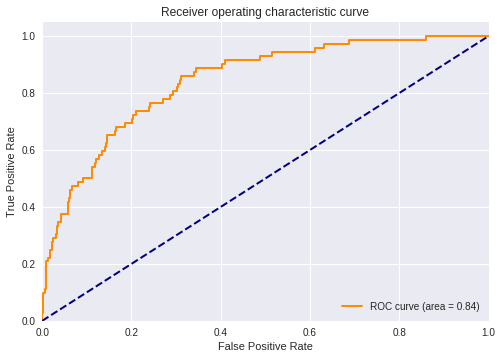

In [14]:
plot_ROC_curve(linear_clf, X_test, y_test)

##### 2.1e

In [0]:
linear_clf = get_classifier(C=1)
linear_clf.fit(X_train, y_train)
weights = pd.DataFrame({'feature_name': feature_names, 'weight': linear_clf.coef_[0]})

In [16]:
print(f"Features ranked per coefficient:")
print(weights.sort_values(by='weight', ascending=False))

Features ranked per coefficient:
        feature_name    weight
39           mean_pH  0.677943
7           mean_AST  0.484692
21      mean_Lactate  0.362667
10    mean_Bilirubin  0.297603
5           mean_ALP  0.263556
9           mean_BUN  0.155025
38          mean_WBC  0.077498
0                Age  0.067744
35    mean_TroponinI  0.066873
22          mean_MAP  0.065677
31     mean_RespRate  0.058358
19           mean_HR  0.050881
26     mean_NISysABP  0.049003
18          mean_HCT  0.041773
11  mean_Cholesterol  0.041305
16      mean_Glucose  0.036840
30    mean_Platelets  0.032735
14         mean_FiO2  0.020657
36    mean_TroponinT  0.013341
1             Gender  0.005947
3            ICUType  0.004637
8       mean_Albumin  0.003720
33       mean_SysABP  0.003638
2             Height  0.001137
28        mean_PaCO2 -0.000406
25        mean_NIMAP -0.019868
4             Weight -0.030102
29         mean_PaO2 -0.030510
17         mean_HCO3 -0.042887
12   mean_Creatinine -0.043633
24    

On the [Glasgow Coma Scale](https://en.wikipedia.org/wiki/Glasgow_Coma_Scale) a higher value indicates a higher level of consciousness for the patient (the higher the better), hence the negative coeficient for mean_GCS makes sense.

##### 2.2 - RBF-kernel SVM

##### 2.2a

In [0]:
def select_param_rbf(X, y, metric='auroc', k=5, param_range=[]):
    """
    Sweeps different settings for the hyperparameters of an RBF-kernel SVM,
    calculating the k-fold CV performance for each setting on X, y.
    Input:
        X: (n,d) array of feature vectors, where n is the number of examples
           and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: an int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='accuracy'
                 other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
                 and 'specificity')
        parameter_values: a (num_param, 2)-sized array containing the
            parameter values to search over. The first column should
            represent the values for C, and the second column should
            represent the values for gamma. Each row of this array thus
            represents a pair of parameters to be tried together.
    Returns:
        The parameter value(s) for a RBF-kernel SVM that maximize
        the average 5-fold CV performance
    """
    # TODO: Finish implementing this function
    # Hint: This will be very similar to select_param_linear, except
    # the type of SVM model you are using will be different...
    print("RBF SVM Hyperparameter Selection based on %s:" %metric)
    scores = []
    # For each parameter pair to try...
    for p in param_range:
        c= p[0]
        gamma = p[1]
        clf = get_classifier(kernel='rbf', C=c, gamma=gamma)
        # Determine the performance of the defined SVM
        score = cv_performance(clf, X, y, metric, k)
        
        print("C: %.3f gamma: %.3f score: %.4f" % (c, gamma, score))
        scores.append((c, gamma, score))
    # And report the pair (C,gamma) that yielded the best metric performance
    maxval = max(scores, key=lambda x: x[2])
    return maxval[0], maxval[1]


##### 2.2b

In [0]:
import itertools

In [22]:
C_range = np.logspace(-3, 3, 7)
coeff_range = list(np.logspace(-3, 3, 7))
param_range = list(itertools.product(C_range, coeff_range))
best_C, best_gamma = select_param_rbf(X_train, y_train, 'auroc', 5, param_range)

RBF SVM Hyperparameter Selection based on auroc:
C: 0.001 gamma: 0.001 score: 0.7447
C: 0.001 gamma: 0.010 score: 0.7524
C: 0.001 gamma: 0.100 score: 0.7505
C: 0.001 gamma: 1.000 score: 0.7869
C: 0.001 gamma: 10.000 score: 0.7366
C: 0.001 gamma: 100.000 score: 0.6772
C: 0.001 gamma: 1000.000 score: 0.5000
C: 0.010 gamma: 0.001 score: 0.7447
C: 0.010 gamma: 0.010 score: 0.7524
C: 0.010 gamma: 0.100 score: 0.7730
C: 0.010 gamma: 1.000 score: 0.8056
C: 0.010 gamma: 10.000 score: 0.7910
C: 0.010 gamma: 100.000 score: 0.7377
C: 0.010 gamma: 1000.000 score: 0.5000
C: 0.100 gamma: 0.001 score: 0.7456
C: 0.100 gamma: 0.010 score: 0.7572
C: 0.100 gamma: 0.100 score: 0.7866
C: 0.100 gamma: 1.000 score: 0.8059
C: 0.100 gamma: 10.000 score: 0.7912
C: 0.100 gamma: 100.000 score: 0.7396
C: 0.100 gamma: 1000.000 score: 0.5000
C: 1.000 gamma: 0.001 score: 0.7624
C: 1.000 gamma: 0.010 score: 0.7732
C: 1.000 gamma: 0.100 score: 0.7850
C: 1.000 gamma: 1.000 score: 0.8055
C: 1.000 gamma: 10.000 score: 0.7

##### b

In [23]:
print(f"The best pair of parameters is (C, gamma) = ({best_C:.6f}, {best_gamma:.5f})")

The best pair of parameters is (C, gamma) = (0.100000, 1.00000)


In [0]:
rbf_clf = get_classifier(kernel='rbf', C=best_C, gamma=best_gamma)
rbf_clf.fit(X_train, y_train)
test_perf = performance(rbf_clf, X_test, y_test, "auroc")

In [25]:
print(f"Test performance is {test_perf:.4f}. We observe a slight improvement in comparison with the linear-kernel SVM.")

Test performance is 0.8535. We observe a slight improvement in comparison with the linear-kernel SVM.


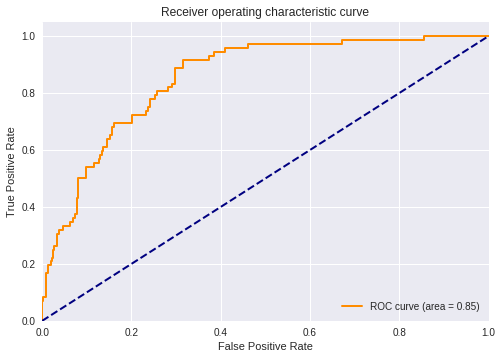

In [26]:
plot_ROC_curve(rbf_clf, X_test, y_test)